In [1]:
import fpy
import m3dc1 as m
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sim = fpy.sim_data(filename = '/home/jfernandes/Software/maglib_local/maglit/our_m3dc1_data/i_coils/n03/C1.h5')

In [3]:
sim.available_fields

{'j': ('current density', 'vector', None, 'simple'),
 'ni': ('density', 'scalar', 'main ion', 'simple'),
 'ne': ('density', 'scalar', 'electron', 'simple'),
 'v': ('fluid velocity', 'vector', None, 'simple'),
 'B': ('magnetic field', 'vector', None, 'simple'),
 'p': ('total pressure', 'scalar', None, 'simple'),
 'pi': ('pressure', 'scalar', 'main ion', 'simple'),
 'pe': ('pressure', 'scalar', 'electron', 'simple'),
 'alpha': ('alpha', 'scalar', None, 'simple'),
 'ti': ('temperature', 'scalar', 'main ion', 'simple'),
 'te': ('temperature', 'scalar', 'electron', 'simple'),
 'A': ('vector potential', 'vector', None, 'simple'),
 'gradA': ('grad vector potential', 'tensor', None, 'simple'),
 'E': ('electric field', 'vector', None, 'simple'),
 'psi': ('psi', 'scalar', None, 'composite'),
 'kprad_rad': ('total radiation', 'scalar', None, 'simple')}

In [4]:
sim.available_traces

['Ave_P',
 'E_K3',
 'E_K3D',
 'E_K3H',
 'E_KP',
 'E_KPD',
 'E_KPH',
 'E_KT',
 'E_KTD',
 'E_KTH',
 'E_MP',
 'E_MPD',
 'E_MPH',
 'E_MT',
 'E_MTD',
 'E_MTH',
 'E_P',
 'E_PD',
 'E_PE',
 'E_PH',
 'E_grav',
 'Flux_kinetic',
 'Flux_poynting',
 'Flux_pressure',
 'Flux_thermal',
 'IP_co',
 'IP_sn',
 'M_IZ',
 'M_IZ_co',
 'M_IZ_sn',
 'Parallel_viscous_heating',
 'Particle_Flux_convective',
 'Particle_Flux_diffusive',
 'Particle_source',
 'Torque_com',
 'Torque_em',
 'Torque_gyro',
 'Torque_parvisc',
 'Torque_sol',
 'Torque_visc',
 'W_M',
 'W_P',
 'Wall_Force_n0_x',
 'Wall_Force_n0_x_halo',
 'Wall_Force_n0_y',
 'Wall_Force_n0_z',
 'Wall_Force_n0_z_halo',
 'Wall_Force_n1_x',
 'Wall_Force_n1_y',
 'angular_momentum',
 'angular_momentum_p',
 'area',
 'area_p',
 'brem_rad',
 'circulation',
 'dt',
 'electron_number',
 'helicity',
 'i_control%err_i',
 'i_control%err_p_old',
 'ion_loss',
 'line_rad',
 'loop_voltage',
 'n_control%err_i',
 'n_control%err_p_old',
 'particle_number',
 'particle_number_p',
 'p

In [5]:
xmag = sim.get_time_trace('xmag')
zmag = sim.get_time_trace('zmag')
print(xmag.values)
print(zmag.values)


[0.62476635 0.62476635]
[0.00610793 0.00610793]


In [6]:
xnull = sim.get_time_trace('xnull')
znull = sim.get_time_trace('znull')
print(xnull.values)
print(znull.values)

[0.46950445 0.46950445]
[-0.21327174 -0.21327174]


In [7]:
#create 2D mesh grid inside region r = [0.435, 0.81]x[-2.4, 2.4]
n = 100
x = np.linspace(0.435, 0.81, n)
y = np.linspace(-0.24, 0.24, n)
X, Y = np.meshgrid(x, y)

#evaluate psi on the mesh grid
Z = np.zeros(X.shape)
for i in range(n):
    for j in range(n):
        Z[i,j] = m.eval_field("ne", X[i,j], 0, Y[i,j], coord='scalar', sim=sim, time=1)

Z0 = np.zeros(X.shape)
for i in range(n):
    for j in range(n):
        Z0[i,j] = m.eval_field("ne", X[i,j], 0, Y[i,j], coord='scalar', sim=sim, time=0)

Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating field 'ne'...  [DONE]
Evaluating

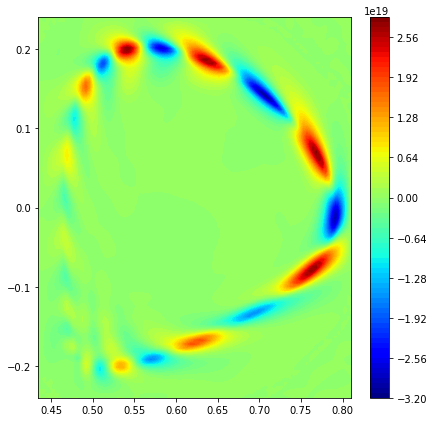

In [8]:
#print psi
plt.figure(figsize=(7,7))
plt.contourf(X, Y, (Z-Z0), 75, cmap='jet')
plt.colorbar()
plt.ylim(-0.24, 0.24)
plt.show()

In [9]:
def eval_field_derivative(m, x, phi, y, sim, time, h=1e-5):
    """Numerically estimate the gradient and Hessian of the field."""
    f_xy = m.eval_field("psi", x, phi, y, coord='scalar', sim=sim, time=time)

    # Partial derivatives (central differences)
    f_x1 = m.eval_field("psi", x + h, phi, y, coord='scalar', sim=sim, time=time)
    f_x2 = m.eval_field("psi", x - h, phi, y, coord='scalar', sim=sim, time=time)
    f_y1 = m.eval_field("psi", x, phi, y + h, coord='scalar', sim=sim, time=time)
    f_y2 = m.eval_field("psi", x, phi, y - h, coord='scalar', sim=sim, time=time)

    dfdx = (f_x1 - f_x2) / (2 * h)
    dfdy = (f_y1 - f_y2) / (2 * h)

    # Second partial derivatives (central differences)
    f_xx = (f_x1 - 2 * f_xy + f_x2) / (h ** 2)
    f_yy = (f_y1 - 2 * f_xy + f_y2) / (h ** 2)

    f_xy1 = m.eval_field("psi", x + h, phi, y + h, coord='scalar', sim=sim, time=time)
    f_xy2 = m.eval_field("psi", x - h, phi, y + h, coord='scalar', sim=sim, time=time)
    f_xy3 = m.eval_field("psi", x + h, phi, y - h, coord='scalar', sim=sim, time=time)
    f_xy4 = m.eval_field("psi", x - h, phi, y - h, coord='scalar', sim=sim, time=time)

    d2fdxdy = (f_xy1 - f_xy2 - f_xy3 + f_xy4) / (4 * h ** 2)

    gradient = np.array([dfdx, dfdy])
    hessian = np.array([[f_xx, d2fdxdy], [d2fdxdy, f_yy]])

    return gradient, hessian

def newton_raphson(m,x0, phi, y0, sim, time, tol=1e-6, max_iter=1000):
    x, y = x0, y0
    for _ in range(max_iter):
        grad, hess = eval_field_derivative(m, x, phi, y, sim, time)
        if np.linalg.norm(grad) < tol:
            return x, y
        try:
            hess_inv = np.linalg.inv(hess)
        except np.linalg.LinAlgError:
            print("Hessian is singular, cannot invert.")
            return None
        delta = -hess_inv @ grad
        x, y = x + delta[0], y + delta[1]
        if np.linalg.norm(delta) < tol:
            return x, y
    return None

x0, y0 = 0.45, -0.18  # Initial guess
phi = 0.2*np.pi # Poloidal cut position
saddle_point = newton_raphson(m,x0, phi, y0, sim, -1)
if saddle_point:
    print("Saddle point found at:", saddle_point)
else:
    print("No saddle point found.")

Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating fie

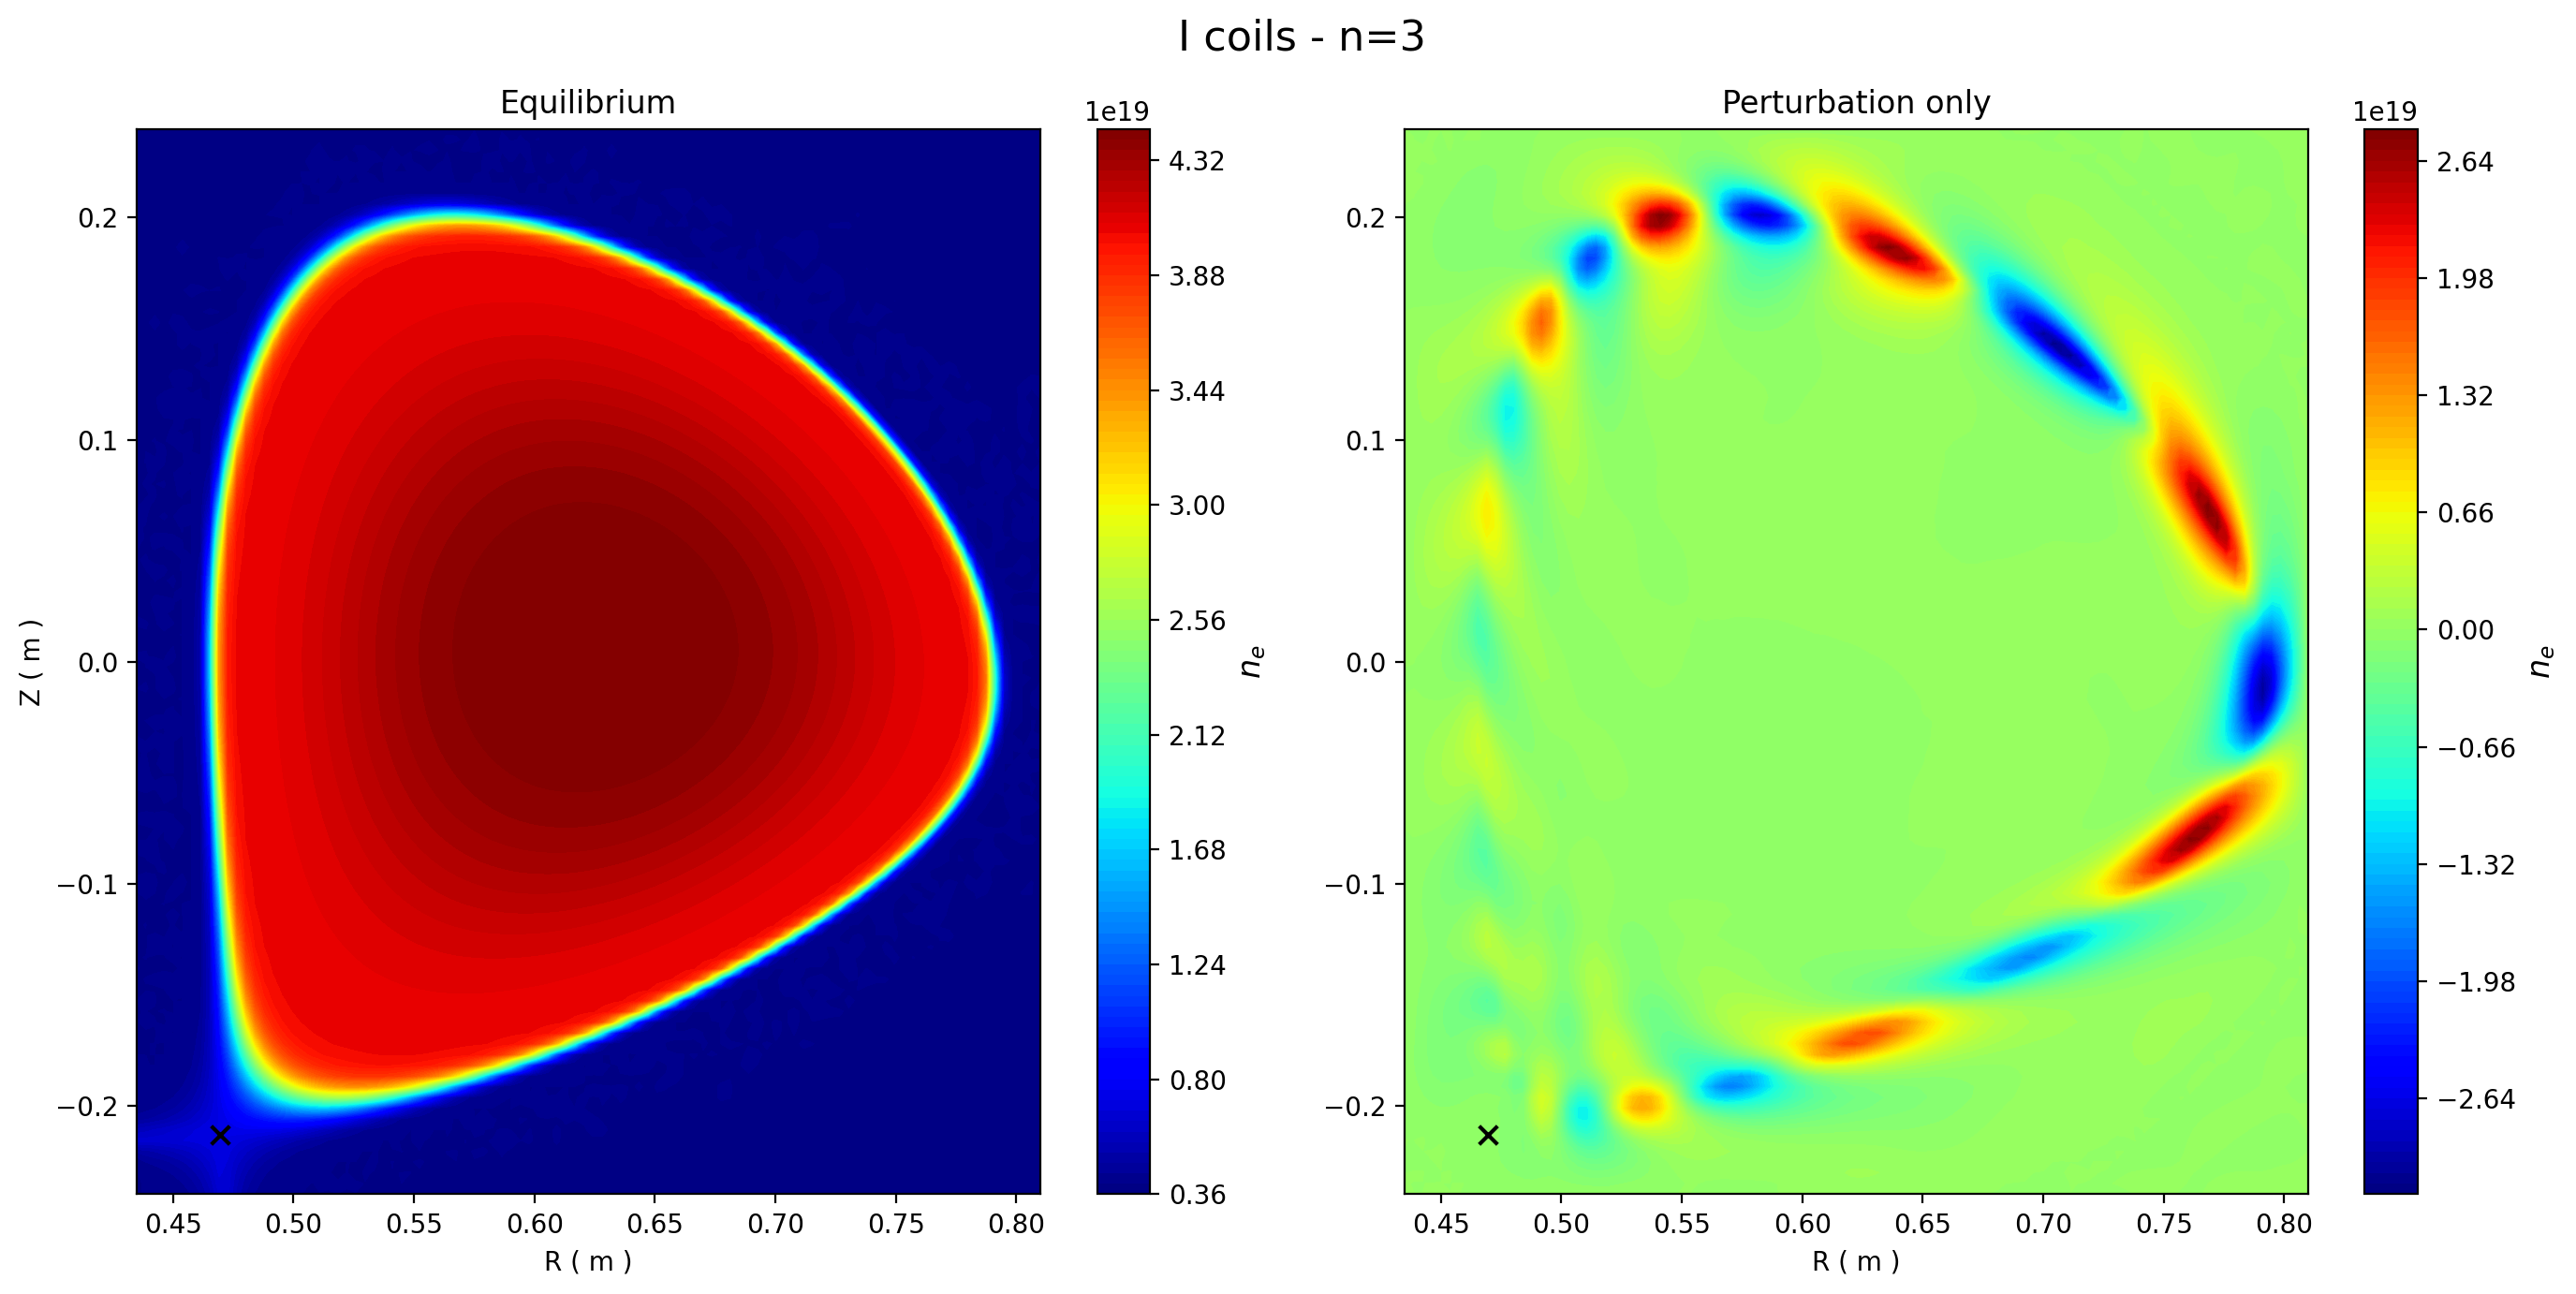

In [11]:
fig, ax = plt.subplots(1,2,figsize=(14, 7),dpi=200)

cbar1 = plt.colorbar(ax[0].contourf(X, Y, (Z0), 100, cmap='jet'), ax=ax[0])
cbar1.set_label(r"$n_e$", fontsize=12)
ax[0].scatter(saddle_point[0], saddle_point[1], marker="x", s=50, color="k")
ax[0].set_xlabel("R ( m )")
ax[0].set_ylabel("Z ( m )")
ax[0].set_title("Equilibrium")

cbar2 = plt.colorbar(ax[1].contourf(X, Y, (Z-Z0), 100, cmap='jet'), ax=ax[1], label=r"$n_e$")
cbar2.set_label(r"$n_e$", fontsize=12)
ax[1].scatter(saddle_point[0], saddle_point[1], marker="x", s=50, color="k")
ax[1].set_xlabel("R ( m )")
ax[1].set_title("Perturbation only")

fig.suptitle("I coils - n=3", fontsize=16)
plt.tight_layout()
#plt.savefig("figuras/ne_cp_coils_antisymm_n06.png")
plt.show()